## Spatial analysis with Geopandas

This notebook analyses the criminal incidents in various postcodes in Victoria

In [6]:
import pandas as pd
import geopandas as gpd

### Load data

#### Get crime data by postcodes

In [7]:
crime = pd.read_csv("../data/processed/poa_crime.csv")
crime.shape

(9001, 4)

In [8]:
crime.head()

,Year,Local Government Area,Postcode,Total Incidents
0,2011,Alpine,3691,5
1,2011,Alpine,3697,4
2,2011,Alpine,3698,3
3,2011,Alpine,3699,13
4,2011,Alpine,3737,153


In [9]:
crime.dtypes

Year                      int64
Local Government Area    object
Postcode                  int64
Total Incidents           int64
dtype: object

In [10]:
crime.Postcode = crime.Postcode.astype(str)

#### Get shapefile of postcodes in Victoria

In [11]:
poa_gdf = gpd.read_file("../data/processed/vic_poa_shapefile.geojson")
poa_gdf.shape

(698, 4)

In [12]:
poa_gdf.head()

,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,3000,3000,3.1881,"POLYGON ((144.96489 -37.80687, 144.96511 -37.8..."
1,3002,3002,1.8557,"POLYGON ((144.97395 -37.81332, 144.97362 -37.8..."
2,3003,3003,6.5821,"POLYGON ((144.90759 -37.80614, 144.90768 -37.8..."
3,3004,3004,3.3164,"POLYGON ((144.97109 -37.83513, 144.97169 -37.8..."
4,3005,3005,0.1183,"POLYGON ((144.95061 -37.82226, 144.95119 -37.8..."


In [29]:
poa_gdf.crs

<Geographic 2D CRS: EPSG:4283>
Name: GDA94
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Australia including Lord Howe Island, Macquarie Islands, Ashmore and Cartier Islands, Christmas Island, Cocos (Keeling) Islands, Norfolk Island. All onshore and offshore.
- bounds: (93.41, -60.56, 173.35, -8.47)
Datum: Geocentric Datum of Australia 1994
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
poa_gdf.dtypes

POA_CODE16      object
POA_NAME16      object
AREASQKM16     float64
geometry      geometry
dtype: object

In [26]:
poa_gdf.geometry

0      POLYGON ((144.96489 -37.80687, 144.96511 -37.8...
1      POLYGON ((144.97395 -37.81332, 144.97362 -37.8...
2      POLYGON ((144.90759 -37.80614, 144.90768 -37.8...
3      POLYGON ((144.97109 -37.83513, 144.97169 -37.8...
4      POLYGON ((144.95061 -37.82226, 144.95119 -37.8...
                             ...                        
693    POLYGON ((145.50862 -38.42730, 145.50916 -38.4...
694    POLYGON ((145.42543 -38.46595, 145.42560 -38.4...
695    POLYGON ((145.55385 -38.54178, 145.55309 -38.5...
696    MULTIPOLYGON (((145.56351 -38.54942, 145.56195...
697    POLYGON ((145.84517 -38.63648, 145.84696 -38.6...
Name: geometry, Length: 698, dtype: geometry

In [27]:
poa_gdf.geometry.area

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      0.000326
1      0.000190
2      0.000673
3      0.000339
4      0.000012
         ...   
693    0.002659
694    0.005078
695    0.010234
696    0.020562
697    0.015703
Length: 698, dtype: float64

In [28]:
poa_gdf.geometry.centroid

/home/danph/anaconda3/envs/pysal-workshop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      POINT (144.96569 -37.81472)
1      POINT (144.98259 -37.81443)
2      POINT (144.92520 -37.80933)
3      POINT (144.97729 -37.83505)
4      POINT (144.95255 -37.82270)
                  ...             
693    POINT (145.52621 -38.45105)
694    POINT (145.46584 -38.47673)
695    POINT (145.58331 -38.53206)
696    POINT (145.58934 -38.57552)
697    POINT (145.75884 -38.61690)
Length: 698, dtype: geometry

In [15]:
### Get postcodes in Victoria


### Join data

In [16]:
crime_gdf = crime.merge(poa_gdf, how="left", left_on="Postcode", right_on="POA_CODE16")
crime_gdf.shape

(9001, 8)

In [18]:
crime_gdf.head()

,Year,Local Government Area,Postcode,Total Incidents,POA_CODE16,POA_NAME16,AREASQKM16,geometry
0,2011,Alpine,3691,5,3691,3691,1837.4123,"MULTIPOLYGON (((146.90262 -36.10540, 146.90189..."
1,2011,Alpine,3697,4,3697,3697,140.6154,"POLYGON ((147.13594 -36.69941, 147.13629 -36.6..."
2,2011,Alpine,3698,3,3698,3698,48.8349,"POLYGON ((147.13954 -36.72241, 147.14057 -36.7..."
3,2011,Alpine,3699,13,3699,3699,502.9748,"POLYGON ((147.16186 -36.73468, 147.16187 -36.7..."
4,2011,Alpine,3737,153,3737,3737,1737.5617,"POLYGON ((146.65912 -36.54841, 146.65910 -36.5..."


In [19]:
crime_gdf = gpd.GeoDataFrame(crime_gdf)

In [20]:
crime_gdf.shape, type(crime_gdf)

((9001, 8), geopandas.geodataframe.GeoDataFrame)

In [25]:
crime_gdf.to_file("../data/processed/poa_crime_gdf.geojson",driver="GeoJSON", index=False)

### Visualise postcode by total incidents

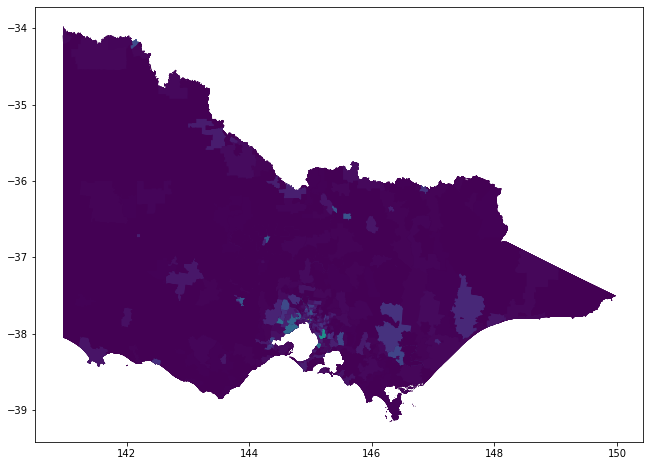

In [23]:
ax = crime_gdf.plot(figsize=(14,8), column="Total Incidents")# 
# poa_gdf.plot(ax=ax, edgecolor='r')